二分类问题，判断病人是否会在5年内患糖尿病。

# 1. Gradient Boosting

Gradient boosting 是构建预测模型最有力的技术.

The idea of boosting came out of the idea of whether a weak learner can be modified to become better. The first realization of boosting that saw great success in application was Adaptive Boosting or AdaBoost for short. The weak learners in AdaBoost are decision trees with a single split, called decision stumps for their shortness.

AdaBoost and related algorithms were recast in a statistical framework and became known as Gradient Boosting Machines. The statistical framework cast boosting as a numerical optimization problem where the objective is to minimize the loss of the model by adding weak learners using a gradient descent like procedure, hence the name.

Gradient Boosting涉及三个要素:

1. A loss function to be optimized, such as cross entropy for classification or mean squared error for regression problems.
2. A weak learner to make predictions, such as a greedily constructed decision tree.
3. An additive model, used to add weak learners to minimize the loss function.

New weak learners are added to the model in an effort to correct the residual errors of all previous trees. The result is a powerful predictive modeling algorithm, perhaps more powerful than random forest.

# 2. XGBoost

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

XGBoost 表示 eXtreme Gradient Boosting.

It was developed by Tianqi Chen and is laser focused on computational speed and model performance, as such there are few frills.

In addition to supporting all key variations of the technique, the real interest is the speed provided by the careful engineering of the implementation, including:

- Parallelization of tree construction using all of your CPU cores during training.
- Distributed Computing for training very large models using a cluster of machines.
- Out-of-Core Computing for very large datasets that don’t fit into memory.
- Cache Optimization of data structures and algorithms to make best use of hardware.

Traditionally, gradient boosting implementations are slow because of the sequential nature in which each tree must be constructed and added to the model.

The on performance in the development of XGBoost has resulted in one of the best predictive modeling algorithms that can now harness the full capability of your hardware platform, or very large computers you might rent in the cloud.

As such, XGBoost has been a cornerstone in competitive machine learning, being the technique used to win and recommended by winners. For example, here is what some recent Kaggle competition winners have said:


# 3. XGBoost Model

[XGBoost Installation Instructions](http://xgboost.readthedocs.io/en/latest/build.html)

XGBoost 在 scikit-learn 中有包装类可直接使用, 分类问题`XGBClassifier`和回归问题`XGBRegressor`.

This is the recommended way to use XGBoost in Python.

下载 [Pima Indians onset of diabetes dataset](https://yunpan.360.cn/surl_ySjyF2INmvt).

数据集列说明：
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

It is a good test dataset for binary classification as all input variables are numeric, meaning the problem can be modeled directly with no data preparation.

通过创建**[XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)**实例，并调用`model.fit()`函数，为分类问题训练XGBoost模型:
```
model = XGBClassifier()
model.fit(X_train, y_train)
```
通过在新数据上调用`model.predict()`函数来预测.
```
y_pred = model.predict(X_test)
```

完整代码如下:

In [10]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# display version
print(xgboost.__version__)

# 加载数据集
dataset = loadtxt('/Users/cap/data/pima-indians-diabetes.csv', delimiter=",")

# 分出变量和标签
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
# 将数据分为训练集和测试集
# 训练集用来学习模型，测试集用来预测
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
# 结果是每个样本属于第一类的概率，需要用 round 将其转换为 0 1 值
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.90
Accuracy: 77.95%


# 4. 监控模型表现

xgboost 可以在模型训练时，评价模型在测试集上的表现.

It supports this capability by specifying both a test dataset and an evaluation metric on the call to model.fit() when training the model and specifying verbose output (verbose=True).

例如, we can report on the binary classification error rate (error) on a standalone test set (eval_set) while training an XGBoost model as follows:

```
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
```
用该配置训练模型时会报告添加每个树之后的性能. 例如:
```
...
[89] validation_0-error:0.204724
[90] validation_0-error:0.208661
...
```
We can use this evaluation to stop training once no further improvements have been made to the model.

We can do this by setting the early_stopping_rounds parameter when calling model.fit() to the number of iterations that no improvement is seen on the validation dataset before training is stopped.

The full example using the Pima Indians Onset of Diabetes dataset is provided below.

In [4]:
# exmaple of early stopping
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
dataset = loadtxt('/Users/cap/data/pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.61224
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.519769
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


# 5. 输出特征重要度

使用像gradient boosting的ensembles of decision tree方法的好处是，它们可以自动地从一个已经训练的预测模型中提供特征重要性.

A trained XGBoost model automatically calculates feature importance on your predictive modeling problem.

These importance scores are available in the feature_importances_ member variable of the trained model. For example, they can be printed directly as follows:
```
print(model.feature_importances_)
```
XGBoost 提供一个内置函数`plot_importance()`按特征重要性绘制:
```
plot_importance(model)
pyplot.show()
```
These importance scores can help you decide what input variables to keep or discard. They can also be used as the basis for automatic feature selection techniques.

The full example of plotting feature importance scores using the Pima Indians Onset of Diabetes dataset is provided below.

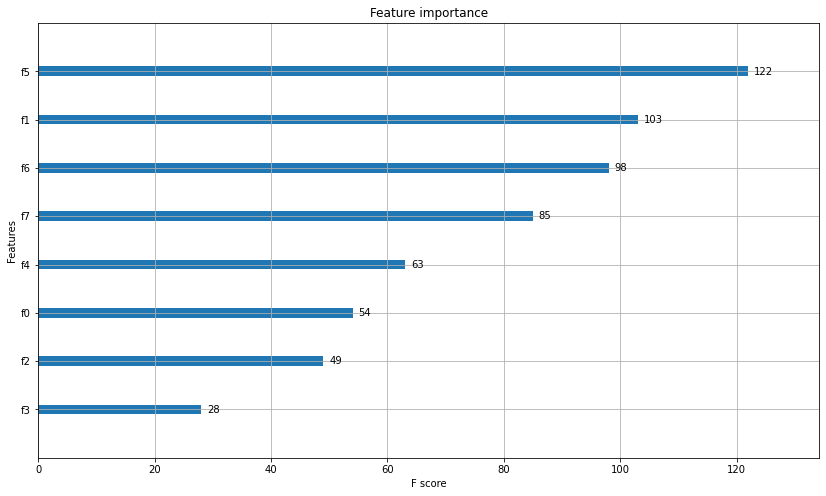

In [4]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# load data
dataset = loadtxt('/Users/cap/data/pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]

# fit model on training data
model = XGBClassifier()
model.fit(X, y)

# plot feature importance
plt.rcParams["figure.figsize"] = (14, 8)
plot_importance(model)
pyplot.show()

# 6. Plot a Single XGBoost Decision Tree

XGBoost提供`plot_tree()`函数绘制模型的decision trees.

`plot_tree()`函数第一个参数是模型, 例如: 绘制模型中的第一个树 (the tree at index 0). This plot can be saved to file or shown on the screen using matplotlib and pyplot.show().

该功能要求你正确安装[graphviz library](http://www.graphviz.org/).

We can create an XGBoost model on the Pima Indians onset of diabetes dataset and plot the first tree in the model .

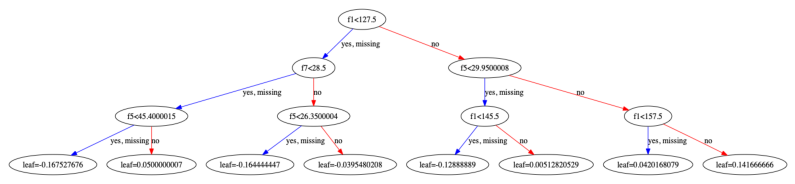

In [7]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

# load data
dataset = loadtxt('/Users/cap/data/pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]

# fit model no training data
model = XGBClassifier()
model.fit(X, y)

# plot single tree
plot_tree(model)
plt.rcParams["figure.figsize"] = (14, 8)
plt.show()

运行上面代码将绘制模型的第一个decision tree, 展示对每个分割的特征和特征值，以及输出的叶子节点.

You can see that variables are automatically named like f1 and f5 corresponding with the feature indices in the input array.

You can see the split decisions within each node and the different colors for left and right splits (blue and red).

The plot_tree() function takes some parameters. You can plot specific graphs by specifying their index to the num_trees argument. For example, you can plot the 5th boosted tree in the sequence as follows:
```python
plot_tree(model, num_trees=4)
```
You can also change the layout of the graph to be left to right (easier to read) by changing the rankdir argument as ‘LR’ (left-to-right) rather than the default top to bottom (UT). For example:
```python
plot_tree(model, num_trees=0, rankdir='LR')
```
The result of plotting the tree in the left-to-right layout is shown below.

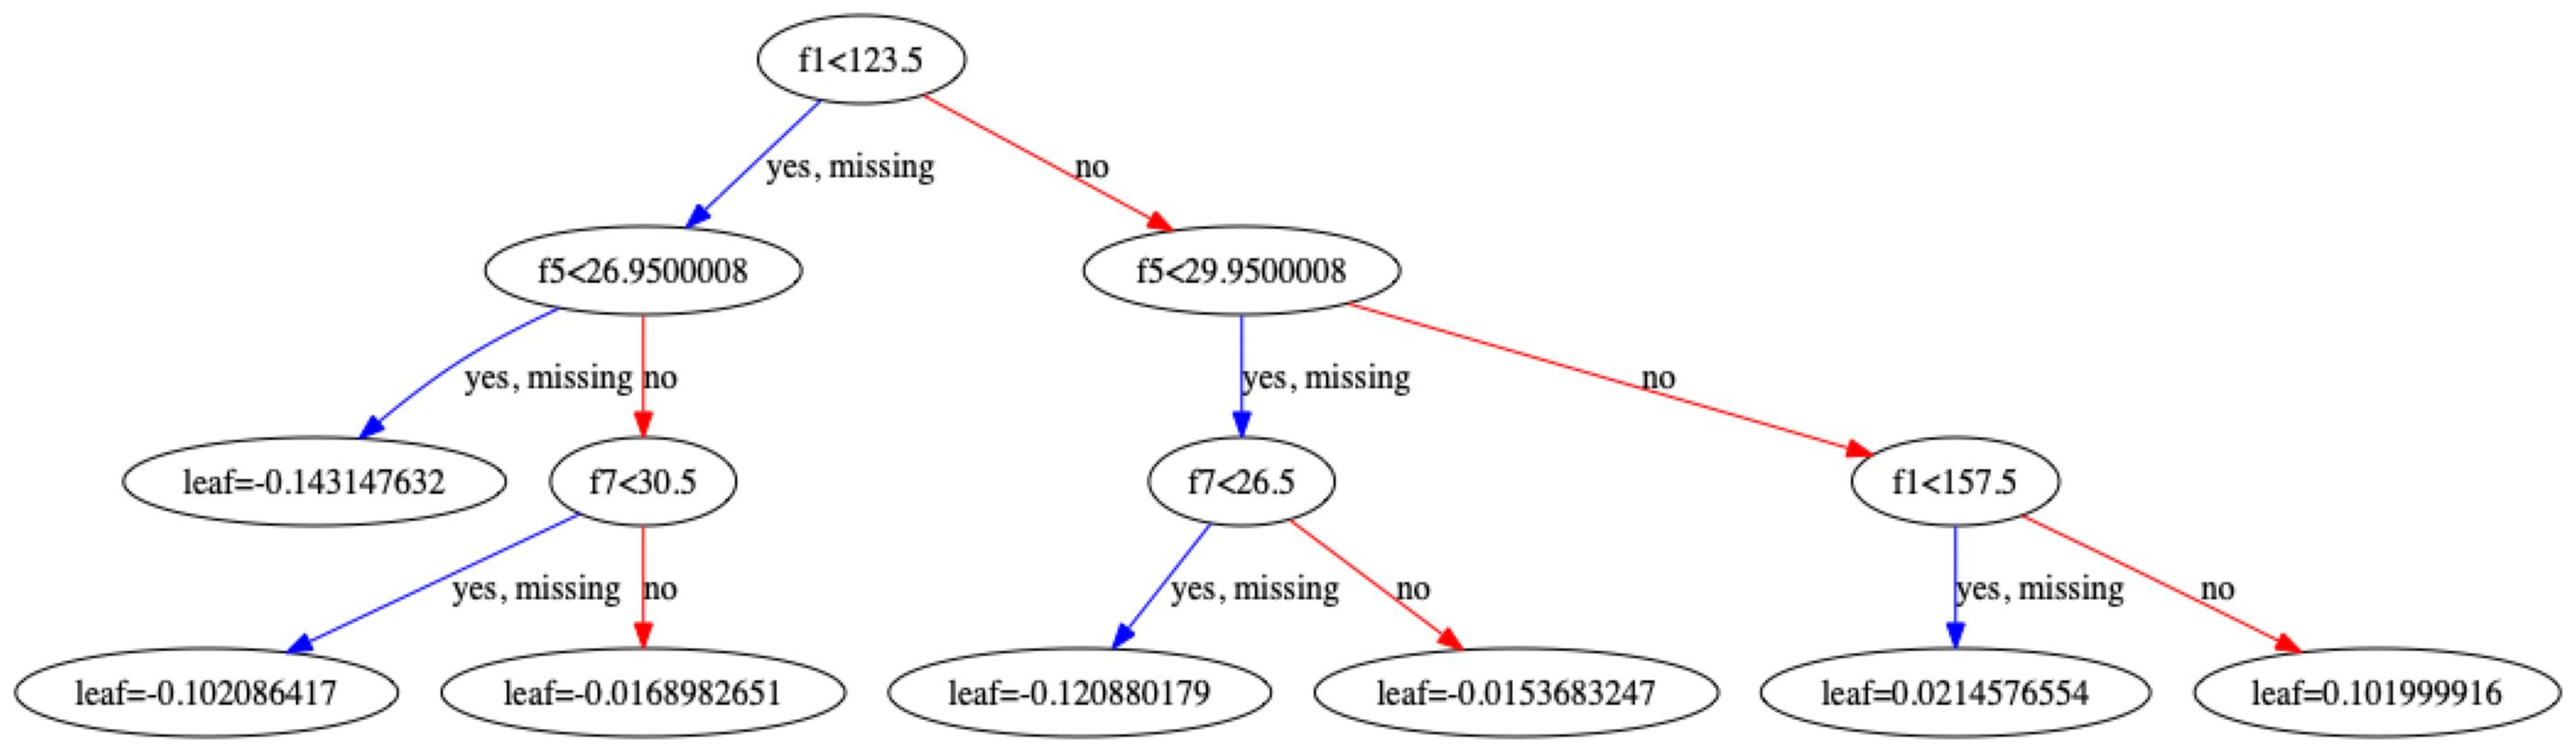

In [8]:
# plot single tree
plot_tree(model, num_trees=4)
plt.rcParams["figure.figsize"] = (14, 8)
plt.show()

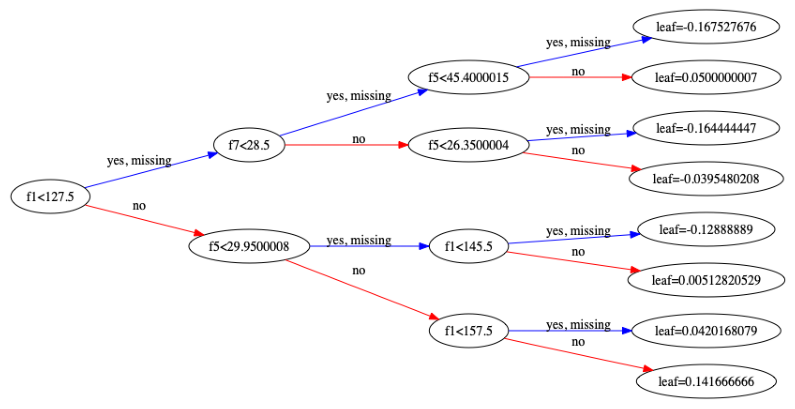

In [9]:
# plot single tree
plot_tree(model, num_trees=0, rankdir='LR')
plt.rcParams["figure.figsize"] = (14, 8)
plt.show()

# 7. Gradient Boosting配置


Gradient boosting is one of the most powerful techniques for applied machine learning and as such is quickly becoming one of the most popular.

如何配置gradient boosting?

A number of configuration heuristics were published in the original gradient boosting papers. They can be summarized as:

- Learning rate or shrinkage (learning_rate in XGBoost) should be set to 0.1 or lower, and smaller values will require the addition of more trees.
- The depth of trees (max_depth in XGBoost) should be configured in the range of 2-to-8, where not much benefit is seen with deeper trees.
- Row sampling (subsample in XGBoost) should be configured in the range of 30% to 80% of the training dataset, and compared to a value of 100% for no sampling.


- learning_rate ＝ 0.1 或更小，越小就需要多加入弱学习器；
- tree_depth ＝ 2～8；
- subsample ＝ 训练集的 30%～80%；


这是配置模型的好开始.

一般好的配置策略如下:

1. Run the default configuration and review plots of the learning curves on the training and validation datasets.
2. If the system is overlearning, decrease the learning rate and/or increase the number of trees.
3. If the system is underlearning, speed the learning up to be more aggressive by increasing the learning rate and/or decreasing the number of trees.

Owen Zhang, the former #1 ranked competitor on Kaggle and now CTO at Data Robot proposes an interesting strategy to configure XGBoost.

他推荐，把树的数量设置为100或1000，然后，调整学习率，寻找更好的模型. This is an efficient strategy for quickly finding a good model.


# 8. 超参调优

The scikit-learn framework provides the capability to search combinations of parameters.

This capability is provided in the GridSearchCV class and can be used to discover the best way to configure the model for top performance on your problem.

For example, we can define a grid of the number of trees (n_estimators) and tree sizes (max_depth) to evaluate by defining a grid as:

```
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
```

And then evaluate each combination of parameters using 10-fold cross validation as:

```
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X, label_encoded_y)
```

We can then review the results to determine the best combination and the general trends in varying the combinations of parameters.

This is the best practice when applying XGBoost to your own problems. The parameters to consider tuning are:

- 树的个数和大小 (n_estimators 和 max_depth).
- 学习率和树的个数 (learning_rate 和 n_estimators).
- 行和列 subsampling rates (subsample, colsample_bytree 和 colsample_bylevel).

Below is a full example of tuning just the learning_rate on the Pima Indians Onset of Diabetes dataset.


The scikit-learn framework provides the capability to search combinations of parameters.

This capability is provided in the GridSearchCV class and can be used to discover the best way to configure the model for top performance on your problem.

For example, we can define a grid of the number of trees (n_estimators) and tree sizes (max_depth) to evaluate by defining a grid as:

In [5]:
# Tune learning_rate
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# load data
dataset = loadtxt('/Users/cap/data/pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.487211 using {'learning_rate': 0.1}
-0.689712 (0.000402) with: {'learning_rate': 0.0001}
-0.661729 (0.003931) with: {'learning_rate': 0.001}
-0.531596 (0.026192) with: {'learning_rate': 0.01}
-0.487211 (0.090035) with: {'learning_rate': 0.1}
-0.531823 (0.114000) with: {'learning_rate': 0.2}
-0.583792 (0.141048) with: {'learning_rate': 0.3}


https://machinelearningmastery.com/xgboost-python-mini-course/

https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/